# Task 4 by The Spark Foundation

<img src='https://internship.thesparksfoundation.info/assests/img/logo.png'>

# Exploratry Data Analysis on Global Terrorism
# Coading done by- Bishal Kumar Das

<img src='https://thumbs.dreamstime.com/b/threats-global-terrorism-illustration-74871925.jpg'>

In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Changing theme of the plots
plt.style.use('bmh')
plt.style.use('seaborn-dark')

In [3]:
#reading the dataset and storing it in variable df
df=pd.read_csv('globalterrorismdb_0718dist.csv')

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#shape of the data
df.shape

(181691, 135)

In [5]:
#setting pandas to display all the rows and columns
pd.set_option("display.max_rows", None,'display.max_columns',None)

In [6]:
#top 5 rows of the dataframe
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [7]:
#cheking the null values
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [8]:
#removing the columns with null values higter than 18169 i.e.=null values more than about 10% of data
for i in df:
    if df[i].isnull().sum()>=18169:
        df=df.drop(i,axis=1)
df.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
target1               636
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
weaptype1               0
weaptype1_txt           0
nkill               10313
nwound              16311
property    

In [9]:
df.shape

(181691, 45)

In [10]:
#checking the datatype of the columns
df.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
multiple            float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
target1              object
natlty1             float64
natlty1_txt          object
gname                object
guncertain1         float64
individual            int64
weaptype1             int64
weaptype1_txt       

In [11]:
#replacing the null values with mode with data type 'object' and mean with data type 'int64 and float64'
for i in df:
    if df[i].dtype=='object':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)
df.isnull().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
target1             0
natlty1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
weaptype1           0
weaptype1_txt       0
nkill               0
nwound              0
property            0
ishostkid           0
dbsource            0
INT_LOG             0
INT_IDEO            0
INT_MISC            0
INT_ANY             0
dtype: int

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
country,181691.0,1.319685e+02,1.124145e+02,4.000000e+00,7.800000e+01,9.800000e+01,1.600000e+02,1.004000e+03
region,181691.0,7.160938e+00,2.933408e+00,1.000000e+00,5.000000e+00,6.000000e+00,1.000000e+01,1.200000e+01
latitude,181691.0,2.349834e+01,1.833495e+01,-5.315461e+01,1.184962e+01,3.112665e+01,3.453856e+01,7.463355e+01
longitude,181691.0,-4.586957e+02,2.021946e+05,-8.618590e+07,1.231572e+00,4.314357e+01,6.835734e+01,1.793667e+02
specificity,181691.0,1.451452e+00,9.954131e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00


In [13]:
#top 10 countries with highest terror attacks
df['country_txt'].value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


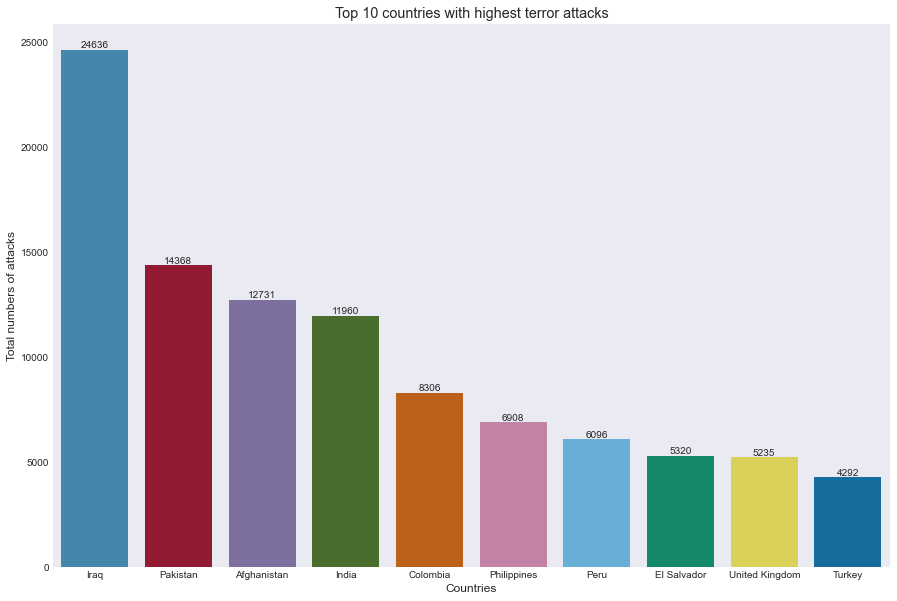

In [14]:
#potting top 10 countries with highest terror attacks
plt.figure(figsize=(15,10))
sns.barplot(df['country_txt'].value_counts().index[:10],df['country_txt'].value_counts().values[:10])
plt.title('Top 10 countries with highest terror attacks')
plt.xlabel('Countries')
plt.ylabel('Total numbers of attacks')
for i in range(len(df['country_txt'].value_counts()[:10])): 
    plt.text(i,df['country_txt'].value_counts()[:10][i],df['country_txt'].value_counts()[:10][i],
             ha='center',va='bottom')
plt.show()

# Top 5 countries are Iraq, Pakistan, Afghanistan, India, Colombia with highest attacks.
## Iraq has a highest number of attacks with 24,636 attacks.
## Security should be increased in these countries as they are more prone to get attack again

In [15]:
#top 10 cities with highest terror attack
df['city'].value_counts()[1:11]

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: city, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


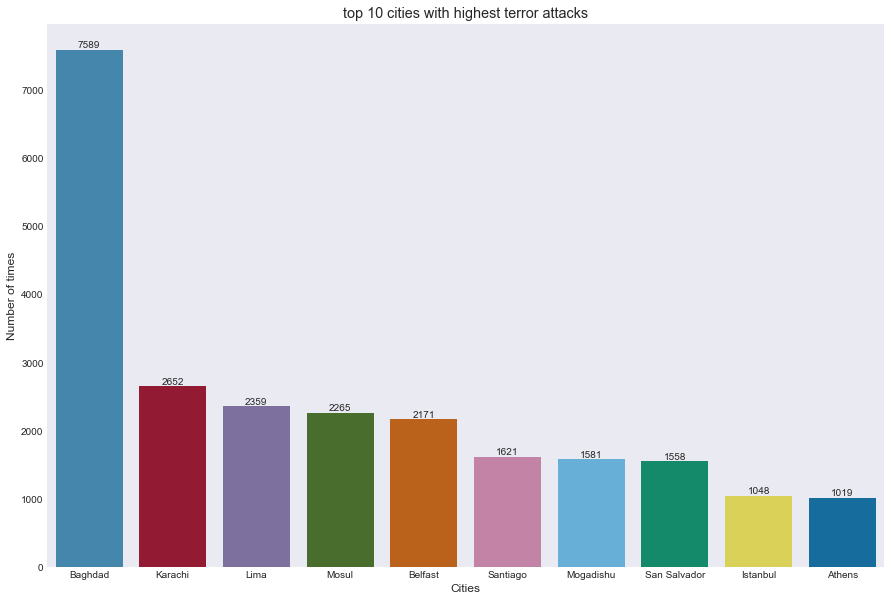

In [16]:
#top 10 cities with highest terror attack
plt.figure(figsize=(15,10))
sns.barplot(df['city'].value_counts().index[1:11],df['city'].value_counts().values[1:11])
plt.title('top 10 cities with highest terror attacks')
plt.xlabel('Cities')
plt.ylabel('Number of times')
for i in range(len(df['city'].value_counts()[1:11])): 
    plt.text(i,df['city'].value_counts()[1:11][i],df['city'].value_counts()[1:11][i],
             ha='center',va='bottom')

# Baghdad has the most numbers of attacks with 7,589 attacks.

In [17]:
#types to attack types and there counts
df['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

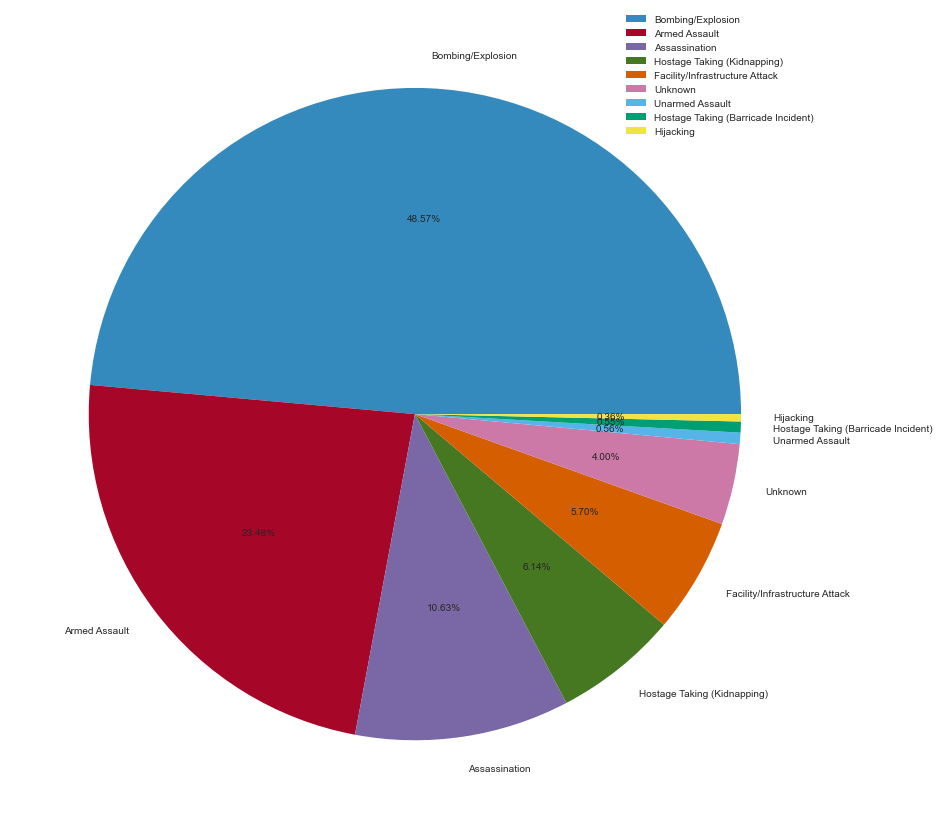

In [18]:
#plotting it in pie chart
plt.figure(figsize=(15,15))
plt.pie(df['attacktype1_txt'].value_counts(),
        labels=df['attacktype1_txt'].value_counts().index,autopct='%1.2f%%')
plt.legend()
plt.show()

# The most attack type is Bombing Explosion i.e. 48.57% and then Armed Assaults i.e. 23.48%. 

In [19]:
#most targeted region
df['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


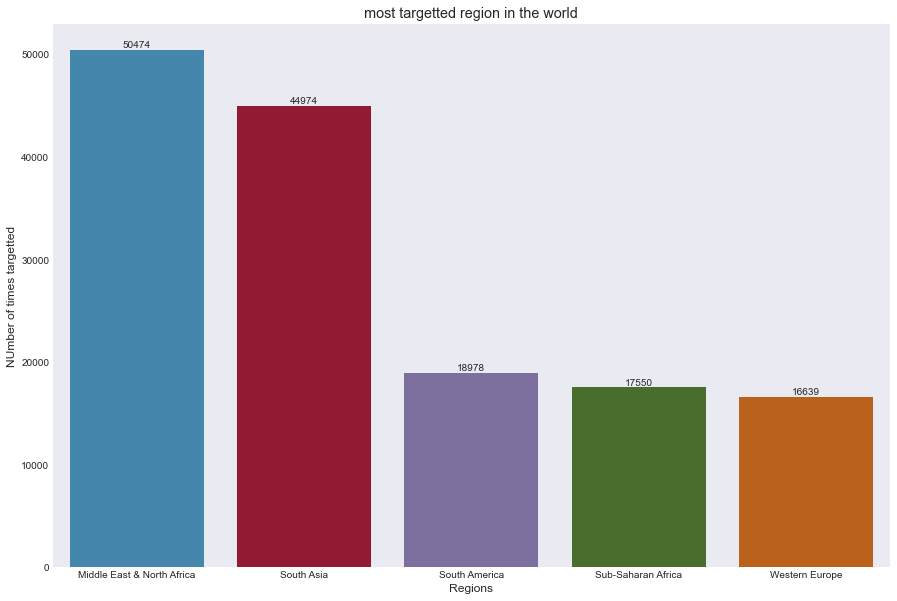

In [20]:
#plotting top 5 targeted region 
plt.figure(figsize=(15,10))
sns.barplot(df['region_txt'].value_counts().index[0:5],df['region_txt'].value_counts().values[0:5])
plt.xlabel('Regions')
plt.ylabel('NUmber of times targetted')
plt.title('most targetted region in the world')
for i in range(len(df['region_txt'].value_counts()[0:5])): 
    plt.text(i,df['region_txt'].value_counts().values[0:5][i],df['region_txt'].value_counts().values[0:5][i]
             ,ha='center',va='bottom')

# Middile East & North Africa is the most attacked region with 50,474 numbers of times targetted.

In [21]:
#most attack type
df['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [22]:
#most target type
df['targsubtype1_txt'].value_counts()[0:10]

Unnamed Civilian/Unspecified                               21969
Police Security Forces/Officers                            11178
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Police Patrol (including vehicles and convoys)              5105
Name: targsubtype1_txt, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


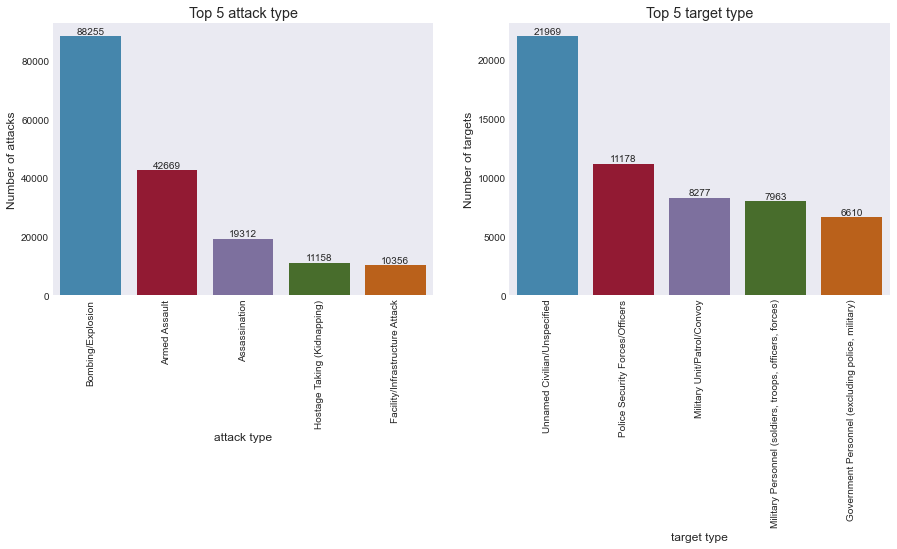

In [23]:
#plotting top 5 attack type
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df['attacktype1_txt'].value_counts().index[0:5],df['attacktype1_txt'].value_counts().values[0:5])
plt.title('Top 5 attack type')
plt.xlabel('attack type')
plt.ylabel('Number of attacks')
plt.xticks(rotation=90)
for i in range(len(df['attacktype1_txt'].value_counts()[0:5])): 
    plt.text(i,df['attacktype1_txt'].value_counts().values[0:5][i],df['attacktype1_txt'].value_counts().values[0:5][i]
             ,ha='center',va='bottom')

#plotting top 5 target type
plt.subplot(1,2,2)
sns.barplot(df['targsubtype1_txt'].value_counts().index[0:5],df['targsubtype1_txt'].value_counts().values[0:5])
plt.title('Top 5 target type')
plt.xlabel('target type')
plt.ylabel('Number of targets')
plt.xticks(rotation=90)
for i in range(len(df['targsubtype1_txt'].value_counts()[0:5])): 
    plt.text(i,df['targsubtype1_txt'].value_counts().values[0:5][i],
             df['targsubtype1_txt'].value_counts().values[0:5][i],ha='center',va='bottom')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


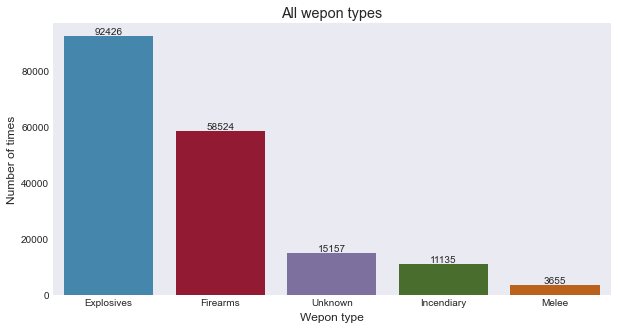

In [24]:
#plotting top 5 attack type
plt.figure(figsize=(10,5))
sns.barplot(df['weaptype1_txt'].value_counts().index[0:5],df['weaptype1_txt'].value_counts().values[0:5])
plt.title('All wepon types')
plt.xlabel('Wepon type')
plt.ylabel('Number of times')

for i in range(len(df['weaptype1_txt'].value_counts()[0:5])): 
    plt.text(i,df['weaptype1_txt'].value_counts().values[0:5][i],
             df['weaptype1_txt'].value_counts().values[0:5][i],ha='center',va='bottom')

# Explosives wepon type is most used by the terrorist.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


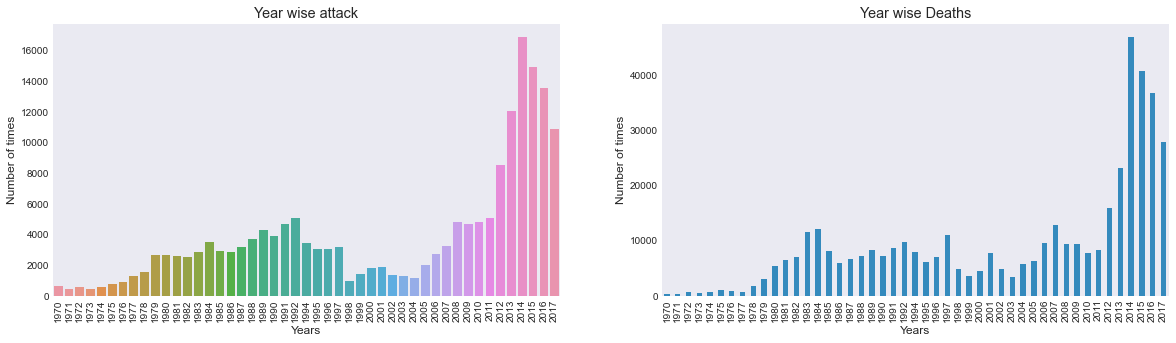

In [30]:
#plotting year wise attacks
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(df['iyear'].value_counts().index,df['iyear'].value_counts().values)
plt.title('Year wise attack')
plt.xlabel('Years')
plt.ylabel('Number of times')
plt.xticks(rotation=90)
#geouping number of kills per year
nkills=df.groupby(['iyear'])['nkill'].sum()

#plotting numbers of kills over year
plt.subplot(1,2,2)
nkills.plot(kind='bar')
plt.title('Year wise Deaths')
plt.xlabel('Years')
plt.ylabel('Number of times')
plt.xticks(rotation=90)
plt.show()

# As per the data in between 2012 to 2017 there were most attacks and deaths 
# 2014 was the year with hightest number of attacks and deaths

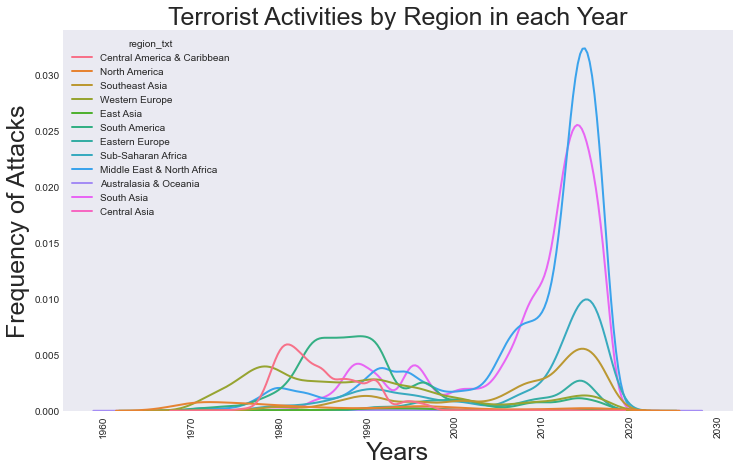

In [26]:
#Terrorist Activities by Region in each Year
plt.figure(figsize = (12,7))
sns.kdeplot(df['iyear'], hue = df['region_txt'])
plt.title('Terrorist Activities by Region in each Year',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Frequency of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

# If we see the graph between year 2010 and 2020 the frequency of attacks has increased in Middile East & North Africa and South Asia

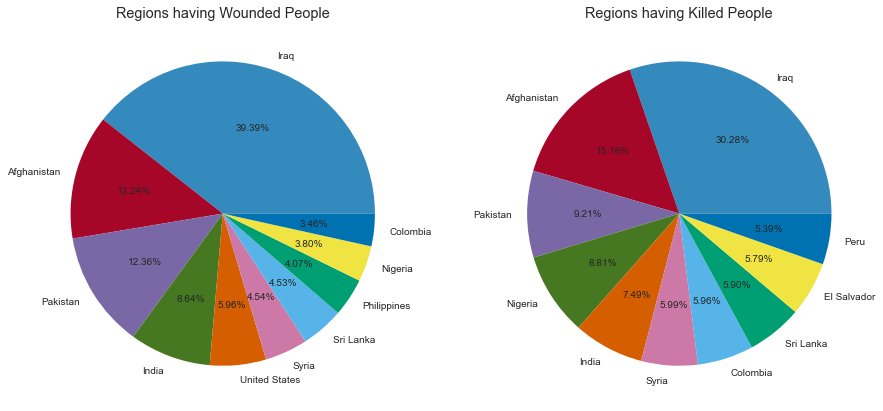

In [27]:
#Regions having Wounded People
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
x=df.groupby(['country_txt'])['nwound'].sum().sort_values(ascending = False)[0:10]
plt.pie(x,labels=x.index,autopct='%1.2f%%')
plt.title('Regions having Wounded People')

#Regions having Killed People
plt.subplot(1,2,2)
y=df.groupby(['country_txt'])['nkill'].sum().sort_values(ascending = False)[0:10]
plt.pie(y,labels=y.index,autopct='%1.2f%%')
plt.title('Regions having Killed People')
plt.show()

# In this pie chart we can see country like iraq have killed people ratio less than wound people ratio where Afghanistan have killed people ratio more than wound people ratio 
# Country where killed ratio is more need to focus on more security to the civilians

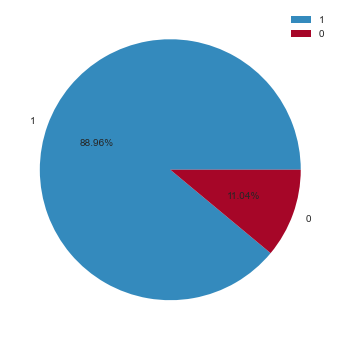

In [28]:
plt.figure(figsize=(10,6))
plt.pie(df['success'].value_counts(),autopct='%1.2f%%',labels=df['success'].value_counts().index)
plt.legend()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Counts of succesfull and unsuccesful attacks')

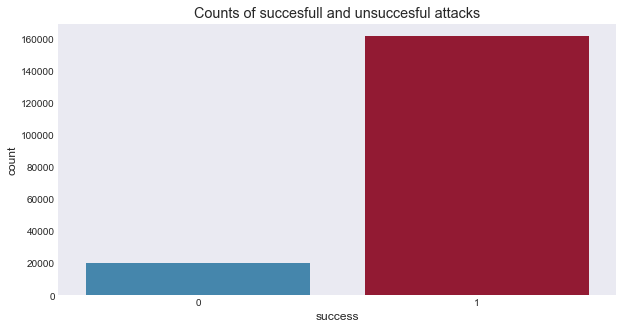

In [29]:
#succesfull and unsuccesful attacks
plt.figure(figsize=(10,5))
sns.countplot(df['success'])
plt.title('Counts of succesfull and unsuccesful attacks')

## This is showing the counts of success of attacks are more than unsuccesfull attacks.

# Conclusion

## After performing the Exploratory Data Analysis we get the following insights from the data:

### 1. Top 5 countries are Iraq, Pakistan, Afghanistan, India, Colombia with highest attacks.

### 2.Iraq has a highest number of attacks with 24,636 attacks.

### 3.Baghdad has the most numbers of attacks with 7,589 attacks.

### 4.The most attack type is Bombing Explosion i.e. 48.57% and then Armed Assaults i.e. 23.48%. 

### 5.Middile East & North Africa is the most attacked region with 50,474 numbers of times targetted.

### 6. Explosives wepon type is most used by the terrorist.

### 7.If we see the graph between year 2010 and 2020 the frequency of attacks has increased in Middile East & North Africa and South Asia.

### 8. In above pie chart we could see country like iraq have killed people ratio less than wound people ratio where Afghanistan have killed people ratio more than wound people ratio 

### 9.This is showing the counts of success of attacks are more than unsuccesfull attacks.

# Recommendation

### 1.Countries like Iraq, Pakistan, Afghanistan, India, Colombia need to increase security as they are more prone to get attack again.

### 2.City like Baghdad need to increase the security as it has highest number of terror attacks.

### 3.Because the most attack type is Bombing Explosion i.e. 48.57% and then Armed Assaults i.e. 23.48% countries should increase security in there borders to ristrict the smuggling of Explosive item and Arms across the borders.

### 4.More surveillance is required especially in the Middle East & North African Regions.

### 5.Country where killed ratio is more need to focus on more security to the civilians


# If we take all these above measures the success rate of the terrorist could be decreased.

#                                 Thank you